# HHA550_Stroke Prediction Dataset

## Healtcare-dataset-stroke-data

#### (Check Modules folders for csv and ipynb for each class)

# DATA
## Stroke Prediction Dataset


#### 
Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information

    1) id: unique identifier

    2) gender: "Male", "Female" or "Other"

    3) age: age of the patient

    4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

    5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

    6) ever_married: "No" or "Yes"

    7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

    8) Residence_type: "Rural" or "Urban"

    9) avg_glucose_level: average glucose level in blood

    10) bmi: body mass index

    11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

    12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# .CSV Data
### Healtcare-dataset-stroke-data.csv

# IMPORTING Everthing

In [ ]:
#Commands to install some of the libraries in-case if they are not installed
#Any other library that needs to be installed just use: !pip install <library name>
!pip install seaborn
!pip install missingno
!pip install xgboost
!pip install catboost
!pip install regex
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install imblearn
!pip install lightgbm
!pip install -U scikit-learn

In [2]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction 

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

Import additional items as needed...
We may not use them all in this course...

In [3]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

* If from imblearn.oversampling import SMOTE does not load use
    `conda install -c conda-forge imbalanced-learn`
* Then rerun
    `from imblearn.over_sampling import SMOTE`

# Exploratory Data Analysis (EDA)

## Start with Loading the CSV Data

In [5]:
#upload the csv and declare its name to = the csv
#for this course we will name the dataframe 'stroke', but you can change it to df or anything else you want.
#Find the file path to the .csv
#Then use code below to read .csv
diabetes = pd.read_csv('C:/Users/Shad/.pyenv/PProjects/diabetes-analysis/data/cleandata.csv')

#### Looking at the data
Now we will try to look at the some of the rows of the dataframe. If you need to see more than 5 lines of the dataframe you can use the parameter inside the 'head' function. 
Like: 'stroke.head(n = 10)'

In [ ]:
#make sure csv has been assigned to declared name and can be read
diabetes.head(10)
# this command will give you the first 5 lines of the csv (0,1,2,3,4)

Unnamed: 0  encounter_id  patient_nbr  race  gender  age  \
0           0       2278392      8222157     3       1    1   
1           1        149190     55629189     3       1    2   
2           2         64410     86047875     1       1    3   
3           3        500364     82442376     3       2    4   
4           4         16680     42519267     3       2    5   
5           5         35754     82637451     3       2    6   
6           6         55842     84259809     3       2    7   
7           7         63768    114882984     3       2    8   
8           8         12522     48330783     3       1    9   
9           9         15738     63555939     3       1   10   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   
5                  2                         1                    2   
6                  3                         1                    2   
7                  1                         1                    7   
8                  2                         1                    4   
9                  3                         3                    4   

   time_in_hospital  ...  tolazamide  insulin  glyburide-metformin  \
0                 1  ...           0        0                    0   
1                 3  ...           0        3                    0   
2                 2  ...           0        0                    0   
3                 2  ...           0        3                    0   
4                 1  ...           0        2                    0   
5                 3  ...           0        2                    0   
6                 4  ...           0        2                    0   
7                 5  ...           0        0                    0   
8                13  ...           0        2                    0   
9                12  ...           0        2                    0   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                    0                         0                        0   
1                    0                         0                        0   
2                    0                         0                        0   
3                    0                         0                        0   
4                    0                         0                        0   
5                    0                         0                        0   
6                    0                         0                        0   
7                    0                         0                        0   
8                    0                         0                        0   
9                    0                         0                        0   

   metformin-pioglitazone change diabetesMed readmitted  
0                       0      0           0          0  
1                       0      1           1          1  
2                       0      0           1          0  
3                       0      1           1          0  
4                       0      1           1          0  
5                       0      0           1          1  
6                       0      1           1          0  
7                       0      0           1          1  
8                       0      1           1          0  
9                       0      1           1          0  

[10 rows x 47 columns]

In [6]:
#Some more intial looks at the data to make sure proper cleanning has been done
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  int64 
 4   gender                    101766 non-null  int64 
 5   age                       101766 non-null  int64 
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  medical_specialty         101766 non-null  int64 
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

# Exploring and Understanding the Data


### Initial Insights
* That makes it a lot easier to compare the missing value percentages within the columns.
* In our dataset, we have both numerical and categorical variables.
* It is essential to see whether columns are correctly inferred.
* The most important one to look for is our target variable 'stroke'
* 'Stroke' is detected as an integer, not as an object.
* Target variable is coded as 1 for positive cases (has a stroke) and 0 for negative cases (does not have a stroke)
* Both 'Hypertension' and 'heart disease" are detected as an integer, not as an object.
* Just remember from the data definition part, they are coded as 1 for the positive cases(has hypertension/heart disease)
* And 0 for the negative cases (does not have hypertension/heart disease)
* We don't need to change them, but it is good to see and be aware of it.
* In addition to them, we have 3 categorical variables, which we have to encode as numerical

**Note: In this case we do not need to know the exact missing percentage of the columns.**

# What are the current problems we have that need to be solved?
* We have binary classification problem.
* We make prection on the target variable `stroke`
* And we will build a model to get best prediction on the stroke variable.

## Insights into our target variable
* One of the first steps of exploratory data analysis should always be to look at what the values of y look like.

In [ ]:
y = diabetes['readmitted']
print(f'Percentage of patient that were not readmitted: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)\nPercentage of patient that were readmitted after 30 days: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient that were readmitted before 30 days: % {round(y.value_counts(normalize=True)[2]*100,2)} --> ({y.value_counts()[2]} patient)')

Percentage of patient that were not readmitted: % 53.91 --> (54864 patient)
Percentage of patient that were readmitted after 30 days: % 34.93 --> (35545 patient)
Percentage of patient that were readmitted before 30 days: % 11.16 --> (11357 patient)


### So what does that all mean?
We have imbalanced data

* Almost 95% of the instances of our target variable are `No stroke`
* 4861 patient do not have a stroke
* 5% of the instances of our target variable are `Stroke`
* 249 patient have a stroke.

### Visualize stroke

In [7]:
fig = px.histogram(diabetes, x="readmitted", title='Readmitted', width=400, height=400)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

* The stroke dataset is an example of a so-called imbalanced dataset.
* There are 19 times more people who didn’t have stroke in our data than who had (the non-stroke class dominates the stroke class)
* We can clearly see that: the stroke rate in our data is 0.048
* Which is a strong indicator of class imbalance

## Data Imbalance

* Instances across classes are imbalanced, like in our dataset, we have imbalance data.

* The problem is, most of the machine learning algorithm do not work well with the imbalanced data.

* Some of the metrics (like accuracy) give us misleading results.

* Most of the time in classification problems our interest is to get better predict on the minority class.

* In our example: People had a stroke is minority class.

* Otherwise our machine learning algorithm falsely predicts majority class.

* In our example: No stroke is majority class

## Decide on Metrics

* This is the first step when approaching a machine learning problem: decide the metric!

* The choice of the wrong metric can mean choosing the wrong algorithm.

* We see that the target is skewed and thus the best metric for this binary classification problem would be Area Under the ROC Curve (AUC).

* We can use precision and recall too, but AUC combines these two metrics.

* We have already seen the label/target distribution, and we know that it is a binary classification problem with skewed targets. Thus, we will be using StratifiedKFold to split the data

* Just for further info, it is not advisable to use accuracy as an evaluation metric, when dealing with higly imbalanced data

In [ ]:
 stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Check for Missing Data / Missing Values

In [ ]:
def missing (diabetes):
    missing_number = diabetes.isnull().sum().sort_values(ascending=False)
    missing_percent = (diabetes.isnull().sum()/diabetes.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(diabetes)

Missing_Number  Missing_Percent
Unnamed: 0                             0              0.0
miglitol                               0              0.0
chlorpropamide                         0              0.0
glimepiride                            0              0.0
acetohexamide                          0              0.0
glipizide                              0              0.0
glyburide                              0              0.0
tolbutamide                            0              0.0
pioglitazone                           0              0.0
rosiglitazone                          0              0.0
acarbose                               0              0.0
troglitazone                           0              0.0
repaglinide                            0              0.0
tolazamide                             0              0.0
insulin                                0              0.0
glyburide-metformin                    0              0.0
glipizide-metformin                    0              0.0
glimepiride-pioglitazone               0              0.0
metformin-rosiglitazone                0              0.0
metformin-pioglitazone                 0              0.0
change                                 0              0.0
diabetesMed                            0              0.0
nateglinide                            0              0.0
metformin                              0              0.0
encounter_id                           0              0.0
num_lab_procedures                     0              0.0
patient_nbr                            0              0.0
race                                   0              0.0
gender                                 0              0.0
age                                    0              0.0
admission_type_id                      0              0.0
discharge_disposition_id               0              0.0
admission_source_id                    0              0.0
time_in_hospital                       0              0.0
medical_specialty                      0              0.0
num_procedures                         0              0.0
A1Cresult                              0              0.0
num_medications                        0              0.0
number_outpatient                      0              0.0
number_emergency                       0              0.0
number_inpatient                       0              0.0
diag_1                                 0              0.0
diag_2                                 0              0.0
diag_3                                 0              0.0
number_diagnoses                       0              0.0
max_glu_serum                          0              0.0
readmitted                             0              0.0

<Axes: >

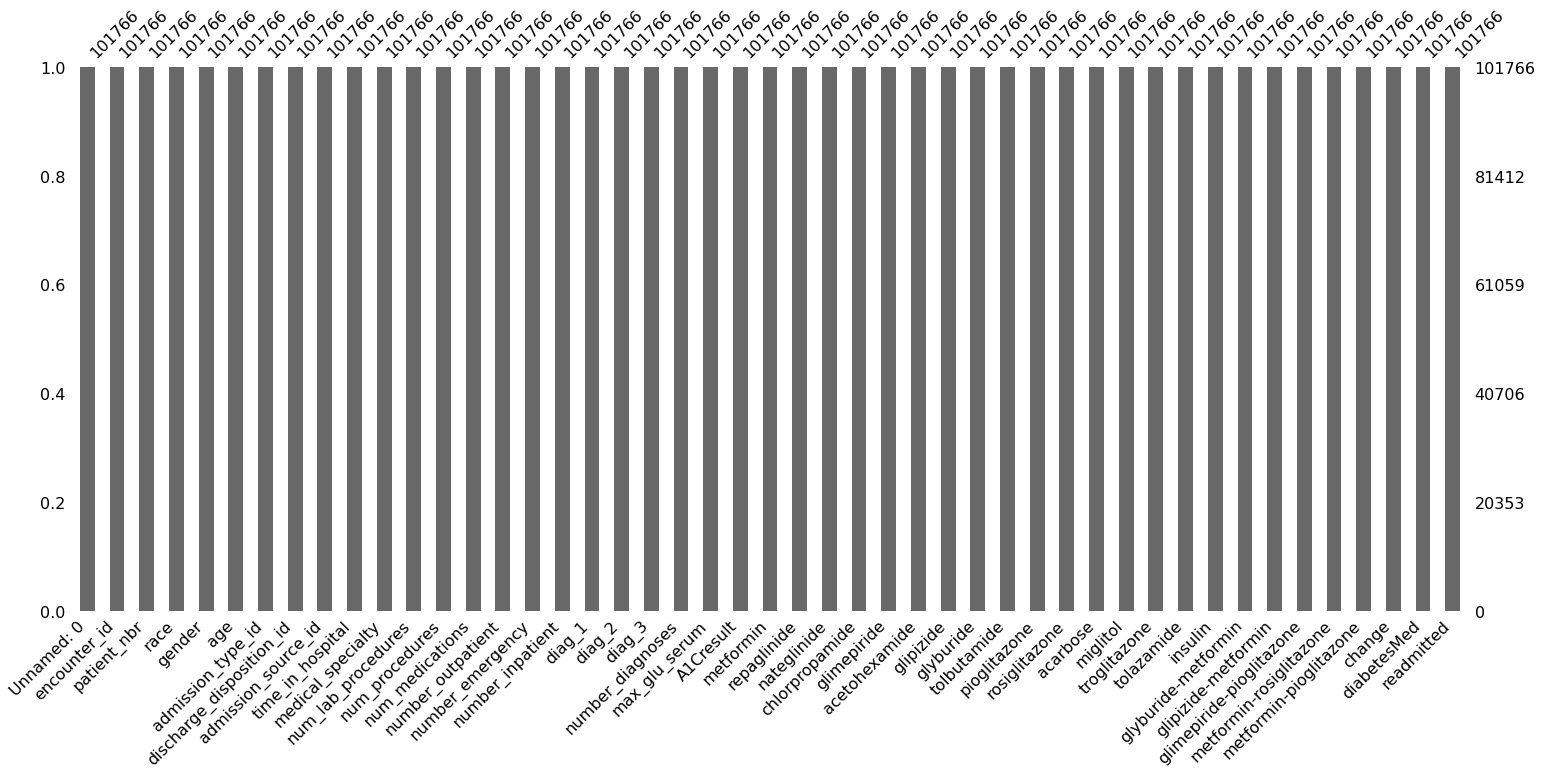

In [ ]:
# Visualizing the missing data to get more idea
msno.bar(diabetes)

<Axes: >

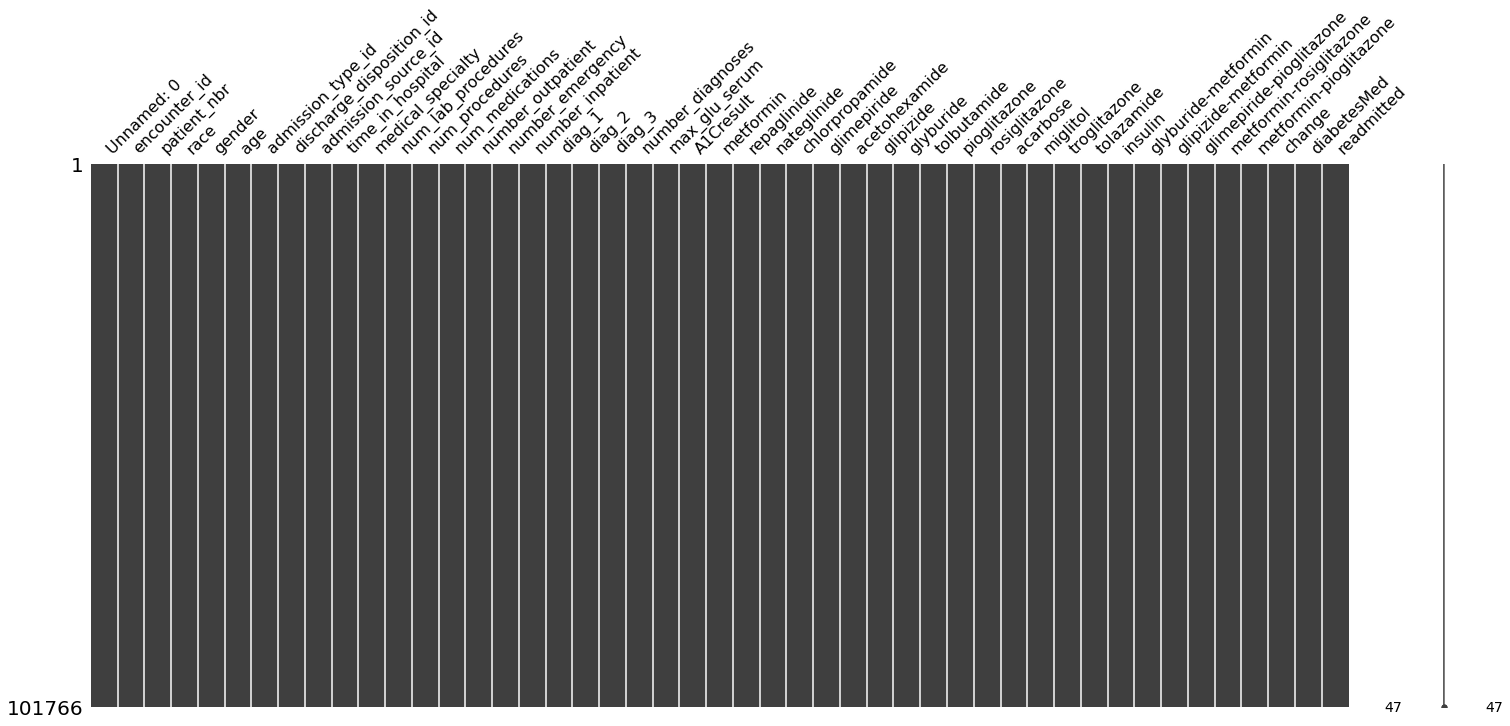

In [ ]:
msno.matrix(diabetes)

* We have missing values on the 'bmi', which is at around %4.
* It seem that we have random missing values.
* We will handle it by using pipeline during the modeling.

# Numerical Features
* Look at the data elements (columns) using `stroke.head()`
* Look at the Dtype (data type) using `stroke.info()`

In [ ]:
diabetes.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
categorical = ['gender', 'race', 'admission_type_id', 'admission_source_id',
'medical_specialty', 'discharge_disposition_id', 'medical_specialty']

numerical = ['age','time_in_hospital', 'num_lab_procedures', 'num_procedures',
             'num_medications', 'number_outpatient', 'number_emergency', 'number_diagnoses']

In [ ]:
diabetes[numerical].describe()

age  time_in_hospital  num_lab_procedures  num_procedures  \
count  101766.000000     101766.000000       101766.000000   101766.000000   
mean        7.096702          4.395987           43.095641        1.339730   
std         1.594084          2.985108           19.674362        1.705807   
min         1.000000          1.000000            1.000000        0.000000   
25%         6.000000          2.000000           31.000000        0.000000   
50%         7.000000          4.000000           44.000000        1.000000   
75%         8.000000          6.000000           57.000000        2.000000   
max        10.000000         14.000000          132.000000        6.000000   

       num_medications  number_outpatient  number_emergency  number_diagnoses  
count    101766.000000      101766.000000     101766.000000     101766.000000  
mean         16.021844           0.369357          0.197836          7.422607  
std           8.127566           1.267265          0.930472          1.933600  
min           1.000000           0.000000          0.000000          1.000000  
25%          10.000000           0.000000          0.000000          6.000000  
50%          15.000000           0.000000          0.000000          8.000000  
75%          20.000000           0.000000          0.000000          9.000000  
max          81.000000          42.000000         76.000000         16.000000

* We have three numerical features in our dataset.

* All of our numerical features are measured in different scales.

* Many machine learning algorithms perform better standard range scaled numerical variables (such as Linear models,artificial neural networks, K-nearest Neighbors,support vector machines, etc.)

* Tree models (such as, decision trees,random forest, etc.) work fine with different range numerical features.

* Based on the mean & median score differences, we can expect

* Slightly left skew on the 'age' (mean: 43.22 & median: 45)
* Slightly right skew on the 'bmi' (mean: 28.89 & median: 28.10)
* And right skew distribution on the 'avg_glucose_level' (mean: 106.14 & median: 91.88)

* Let's check out the skewness

### Skewness

In [ ]:
diabetes[numerical].skew()

age                   -0.630539
time_in_hospital       1.133999
num_lab_procedures    -0.236544
num_procedures         1.316415
num_medications        1.326672
number_outpatient      8.832959
number_emergency      22.855582
number_diagnoses      -0.876746
dtype: float64

* Based on the result, age has slight left skew (negative), other two features have right tail (positively) skewed shape distribution.

### Univariate Analysis

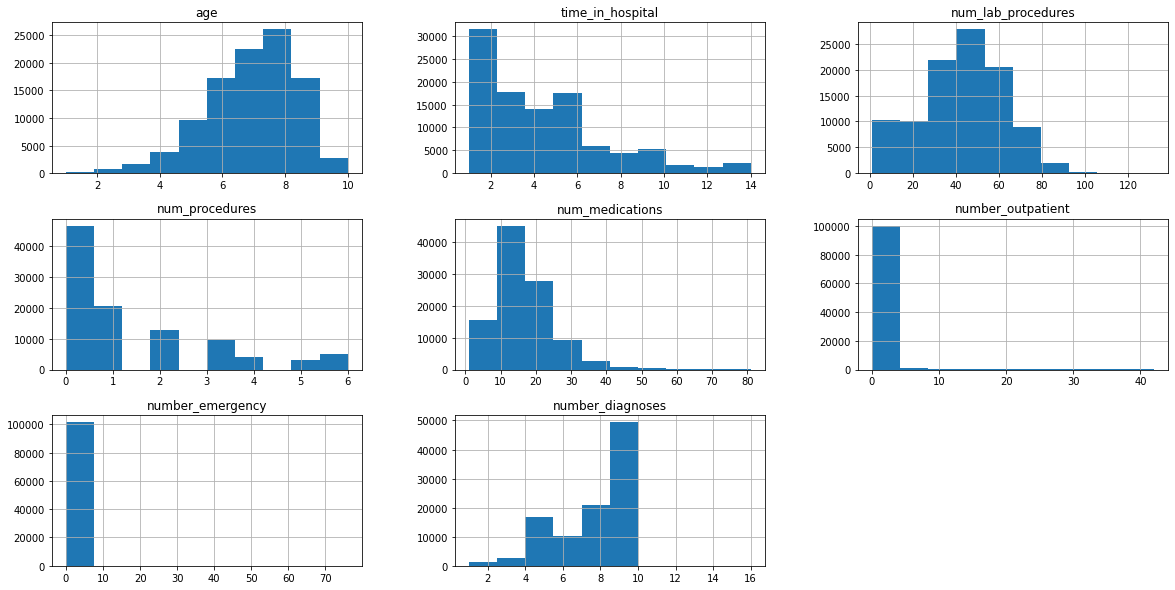

In [ ]:
diabetes[numerical].hist(figsize=(20,10));

* As seen in both skewness result and histograms, numerical features have skewness in different degrees
* We will deal with different scale and skewness during the modeling by using standardization `Standard scaler`

# Categorical Feautres
* Gender
* Race
* Medical Specialty 
* Metformin
* Repaglinide 
* Nateglinide
* Chlorpropamide
* Glimepiride
* Acetohexamide
* Glipizide
* Glyburide
* Tolbutamide
* Pioglitazone
* Rosiglitazone
* Acarbose
* Miglitol
* Troglitazone
* Tolazamide
* Insulin
* Glyburide-metformin
* Glipizide-metformin
* Glimepiride-pioglitazone
* Metformin-rosiglitazone
* Metformin-pioglitazone
* Change
* DiabetesMed
* Readmitted

GENDER

In [ ]:
print (f'{round(diabetes["gender"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="gender", title='Gender', width=500, height=500)
fig.show()

1    53.76
2    46.24
0     0.00
Name: gender, dtype: float64


Gender counts (hover over graph columns to see counts)
* 2994 Females
* 2115 Males
* 1 Other

HYPERTENSION

In [ ]:
print (f'{round(diabetes["race"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="race", title='Race', width=500, height=500)
fig.show()

3    74.78
1    18.88
0     2.23
4     2.00
5     1.48
2     0.63
Name: race, dtype: float64


* 498 patient with hypertension 
* Around 10 % of patients have hypertension

Medical Specialty

In [ ]:
print (f'{round(diabetes["medical_specialty"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="medical_specialty", title='Medical Specialty', width=500, height=500)
fig.show()

0     49.08
19    14.38
9      7.43
12     7.31
4      5.26
      ...  
58     0.00
57     0.00
43     0.00
22     0.00
40     0.00
Name: medical_specialty, Length: 73, dtype: float64


* 276 patient with heart disease
* 5.4% of patients 

MARRIED

In [ ]:
print (f'{round(diabetes["readmitted"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="readmitted", title='Readmitted', width=500, height=500)
fig.show()

0    53.91
1    34.93
2    11.16
Name: readmitted, dtype: float64


* 3353 people have been married (Yes)
* 1757 people have not been married (No)

WORK TYPE

In [ ]:
print (f'{round(stroke["work_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(stroke, x="work_type", title='work_type', width=750, height=750)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

#increase width and height for graphs with more than 2 choices
#try increasing to see what fits best

Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: work_type, dtype: float64


* 2925 people work in the private sector
* 819 people are self-employed
* 687 people stay at home to take care of children
* 657 people work at the government job
* 22 people have never had a job

RESIDENCY

In [ ]:
print (f'{round(stroke["Residence_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(stroke, x="Residence_type", title='Residence_type', width=500, height=500)
fig.show()

Urban    50.8
Rural    49.2
Name: Residence_type, dtype: float64


* 2596 people live in an urban area
* 2514 people live in a rural area

SMOKING

In [ ]:
print (f'{round(stroke["smoking_status"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(stroke, x="smoking_status", title='smoking_status', width=1000, height=1000)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

never smoked       37.03
Unknown            30.22
formerly smoked    17.32
smokes             15.44
Name: smoking_status, dtype: float64


* 1892 people are never smoked
* 1544 people have an unknown smoking status
* 885 people use to smoke
* 789 people currently smoke

# Bivariate Analysis

### Hypertension & Stroke

In [ ]:
print (f'A person with hypertension has a probability of {round(diabetes[diabetes["gender"]==1]["readmitted"].mean()*100,2)} % to have a diabetes')

print()

print (f'A person without hypertension has a probability of  {round(diabetes[diabetes["gender"]==2]["readmitted"].mean()*100,2)} % to have a diabetes')

A person with hypertension has a probability of 58.17 % to have a diabetes

A person without hypertension has a probability of  56.18 % to have a diabetes


In [ ]:
fig = px.histogram(stroke, x="hypertension", color="stroke",width=600, height=400)
fig.show()

* The stroke probability for those who have hypertension are rather different than for those who don't
* 13.2% and 3.9% respectively
* It means that person with hypertension are almost 3.3 times more likely to have a stroke than someone who doesn't have hypertension

### Gender & Stroke

In [ ]:
print (f'A "female" has a probability of {round(stroke[stroke["gender"]=="Female"]["stroke"].mean()*100,2)} % to have a stroke')

print()

print (f'A "male" has a probability of {round(stroke[stroke["gender"]=="Male"]["stroke"].mean()*100,2)} % to have a stroke')

print()

print (f'A person from the "Other" category of gender has a probability of {round(stroke[stroke["gender"]=="Other"]["stroke"].mean()*100,2)} % to have a stroke')

A "female" has a probability of 4.71 % to have a stroke

A "male" has a probability of 5.11 % to have a stroke

A person from the "Other" category of gender has a probability of 0.0 % to have a stroke


In [ ]:
fig = px.histogram(stroke, x="gender", color="stroke",width=600, height=600)
fig.show()

Males are more likely to have a stroke than women, but the difference between the two is small, less than half of 1 %, (0.4%).

### Heart Disease & Stroke

In [ ]:
print (f'A person with heart disease has a probability of {round(stroke[stroke["heart_disease"]==1]["stroke"].mean()*100,2)} % of having a stroke')

print()

print (f'A person without heart disease has a probability of {round(stroke[stroke["heart_disease"]==0]["stroke"].mean()*100,2)} % of having a stroke')

A person with heart disease has a probability of 17.03 % of having a stroke

A person without heart disease has a probability of 4.18 % of having a stroke


In [ ]:
fig = px.histogram(stroke, x="heart_disease", color="stroke",width=600, height=600)
fig.show()

* The probability of having a stroke for those with heart disease are quite different than for those who don't
* 17.03% vs 4.18% respectively
* Basically, a person with heart diease is 4.07 times more likely to have a stroke than someone who doesn't have heart disease

###  * Married & Stroke *

In [ ]:
print (f'A married person (or someone that has been married before) has a probability of {round(stroke[stroke["ever_married"]=="Yes"]["stroke"].mean()*100,2)} % of having a stroke')

print()

print (f'A person that has never married has a probability of {round(stroke[stroke["ever_married"]=="No"]["stroke"].mean()*100,2)} % of having a stroke')

A married person (or someone that has been married before) has a probability of 6.56 % of having a stroke

A person that has never married has a probability of 1.65 % of having a stroke


In [ ]:
fig = px.histogram(stroke, x="ever_married", color="stroke",width=500, height=500)
fig.show()

#### Marriage Can Kill
* Stroke probability for those who are married (or someone that has been married before) are quite different than for those who don't (and might save your life :) )
* 6.56% and % 1.65 respectively
* A married person (or someone that has been married before) is 5.7 times more likely to have a stroke than the someone who has never been married. 

### Work Type & Stroke

In [ ]:
print (f'A person with a private work type has a probability of {round(stroke[stroke["work_type"]=="Private"]["stroke"].mean()*100,2)} % of having a stroke')

print()

print (f'A Self-employed person has a probability of {round(stroke[stroke["work_type"]=="Self-employed"]["stroke"].mean()*100,2)} % of having a stroke')

print()

print (f'A person with a goverment job has a probability of {round(stroke[stroke["work_type"]=="Govt_job"]["stroke"].mean()*100,2)} % of having a stroke')

print()

print (f'A child has a probability of {round(stroke[stroke["work_type"]=="children"]["stroke"].mean()*100,2)} % of having a stroke')

print()

print (f'A person who has never worked has a probability of {round(stroke[stroke["work_type"]=="Never_worked"]["stroke"].mean()*100,2)} % of having a stroke')

A person with a private work type has a probability of 5.09 % of having a stroke

A Self-employed person has a probability of 7.94 % of having a stroke

A person with a goverment job has a probability of 5.02 % of having a stroke

A child has a probability of 0.29 % of having a stroke

A person who has never worked has a probability of 0.0 % of having a stroke


In [ ]:
fig = px.histogram(stroke, x="work_type", color="stroke",width=800, height=600)
fig.show()

* If you have never worked, you will not die by having stroke !!! Just kidding, but funny how the data could be interpreted that way......

* A Self-employed person has a higher probability to get stroke than other work type.

* A person with a private job and goverment job almost have the same probability of having a stroke.

### Residence Type & Stroke

In [ ]:
print (f'A person who lives in an urban area, has a probability of {round(stroke[stroke["Residence_type"]=="Urban"]["stroke"].mean()*100,2)} %  of having a stroke')

print()

print (f'A person who lives in a rural area, has a probability of {round(stroke[stroke["Residence_type"]=="Rural"]["stroke"].mean()*100,2)} % of having a stroke')

A person who lives in an urban area, has a probability of 5.2 %  of having a stroke

A person who lives in a rural area, has a probability of 4.53 % of having a stroke


In [ ]:
fig = px.histogram(stroke, x="Residence_type", color="stroke",width=600, height=400)
fig.show()

* There is not much difference between a person's residence type.
* A person who lives in an urban area has a slightly higher probablity to have a stroke than a person who lives in a rural area.

### Smoking & Stroke

In [ ]:
print (f'A person who has formerly smoked has a probability of {round(stroke[stroke["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)} % of having a stroke')

print()

print (f'A person who has never smoked has a probability of {round(stroke[stroke["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)} % of having a stroke')

print()

print (f'A person who currently smokes has a probability of {round(stroke[stroke["smoking_status"]=="smokes"]["stroke"].mean()*100,2)} % of having a stroke')

print()

print (f'A person whos smoking history is not known has a probability of {round(stroke[stroke["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)} % of having a stroke')

print()

A person who has formerly smoked has a probability of 7.91 % of having a stroke

A person who has never smoked has a probability of 4.76 % of having a stroke

A person who currently smokes has a probability of 5.32 % of having a stroke

A person whos smoking history is not known has a probability of 3.04 % of having a stroke



In [ ]:
fig = px.histogram(stroke, x="smoking_status", color="stroke",width=900, height=600)
fig.show()

* There are differeneces based on smoking habits
* A person who has formerly smoked has a 1.66 times higher probability of having a stroke over a person that has never smoked
* A person smokes has a 1.11 times higher probability of having a stroke over a person that has never smoked

## Metrics of Importance

* The degree of dependency between a categorical variable and the target variable can be measured by using a mutual info score
* Higher values of mutual information mean a higher degree of dependence
* A higher mutual info score implies that we can get a better prediction on the target variable

In [ ]:
from sklearn.metrics import mutual_info_score
def cat_mut_inf(series):
    return mutual_info_score(series, stroke['stroke']) 

stroke_cat = stroke[categorical].apply(cat_mut_inf) 
stroke_cat = stroke_cat.sort_values(ascending=False).to_frame(name='mutual_info_score') 
stroke_cat

mutual_info_score
ever_married             0.006950
work_type                0.006825
hypertension             0.005976
heart_disease            0.005897
smoking_status           0.002750
Residence_type           0.000120
gender                   0.000051

* As seen above, most of the categorical variables have almost no effect on the target variable.
* It would be a good exercise to see the differences on the model between with and without the some of the categorical variables. For the sake of the first study, we will keep the categorical variables in the model

### Correlation Matrix & Scatter Plots

In [ ]:
stroke[numerical].corr()

age  avg_glucose_level       bmi
age                1.000000           0.238171  0.333398
avg_glucose_level  0.238171           1.000000  0.175502
bmi                0.333398           0.175502  1.000000

There is a very small positive correlation between numerical features.
Let us see their mean scores with the target variable

In [ ]:
stroke.groupby('stroke')[numerical].mean()

age  avg_glucose_level        bmi
stroke                                         
0       41.971545         104.795513  28.823064
1       67.728193         132.544739  30.471292

And the correlation with the target variable

In [ ]:
stroke[['age','avg_glucose_level','bmi','stroke']].corr()

age  avg_glucose_level       bmi    stroke
age                1.000000           0.238171  0.333398  0.245257
avg_glucose_level  0.238171           1.000000  0.175502  0.131945
bmi                0.333398           0.175502  1.000000  0.042374
stroke             0.245257           0.131945  0.042374  1.000000

* When age increases, the mean score on the stroke also increases.
* The average glucose level's mean score have differences between a person who will have a stroke or not.
* BMI mean scores are close to each other.
* Correlations with the target variable are very small.

### On to the Scatter Plots

#### Age & BMI

In [ ]:
fig = px.scatter(stroke, x='age', y='bmi', title='Age & BMI ',color='stroke', hover_data = stroke[['stroke']])
fig.show()

#### Age & Average Glucose Level

In [ ]:
fig = px.scatter(stroke, y='avg_glucose_level', x='age', title='Age & Average Glucose Level',color='stroke', hover_data = stroke[['stroke']])
fig.show()

#### Average Glucose Level & BMI

In [ ]:
fig = px.scatter(stroke, y='avg_glucose_level', x='bmi', title='Average Glucose Level & BMI ',color='stroke', hover_data = stroke[['stroke']])
fig.show()

## Insights from the Exploratory Data Analysis (EDA)

* Age and target variable have a weak positive relationship (almost .25).
* The average glucose level's mean scores on the target have differences between a person who has a stroke or not. But this differences are small.
* BMI does not have any significant relationship with the target variable.
* A person with hypertension is almost 3.3 time more likely to have a stroke than someone who doesn't have hypertension.
* A male compared to a female is more likely to have a stroke, but difference between male and female is very small.
* A person with heart diease is 4.07 times more likely to have a stroke than someone who doesn't have heart disease.
* A person that is married(or has been married before) is 5.7 times more likely to have a stroke than the someone who has never been married.... you have been warned haha 
* A self-employed person has a higher probability of having a stroke than other work types. Be carefull !!!
* A person who lives in an urban area has a slightly higher probablity of having a stroke than a person who lives in rural area, but the difference is small.
* There is a small difference between someone who smokes and someone who does not smoke in regard to probability of having a stroke.

# Clean the Data (Feature Engineering)

## There are two options for cleaning this data.  
       1) Cleaning the .csv in Excel
       2) Cleaning the data in Python/Jupyter Notebook
              (We will show how to clean the data in the Notebook)
              
## You may skip this step if you clean your dataset in the .csv document
        (see healthcare-dataset-stroke-data(clean_dataset).csv

### What data are we going to do?
### 1) Drop unnecessary data
### 2) Check for duplicates
### 3) Check for missing data

### Step 1: Drop the columns that are either missing most of the times or are not relevant
* The `id` is an identifier to uniquely identify the visit of a patient in a hospital. Each of the rows are individual instances. Also, there is no importance of this variable from prediction point to of view and hence it would be wise to drop this too.

In [ ]:
# Dropping the columns which are not required
stroke.drop(['id'], axis = 1, inplace = True)

In [ ]:
# Lets see what we just did
stroke.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

### Step 2: Check for duplicates or "dups"
* The `id` is an identifier to uniquely identify the visit of a patient in a hospital.  Lets confirm that there are not duplicate records for `id` or any others.
* We are hoping to see a value of zero "0"

In [ ]:
stroke.duplicated().sum()

0

Confirmed the value of zero "0"

### Step 3: Check for missing data

In [ ]:
#lets understand the data a bit
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


From briefly, looking through the data columns, we can see there are some identification columns, some numerical columns, some categorical (free-text) columns. These columns will be described in more detail below.

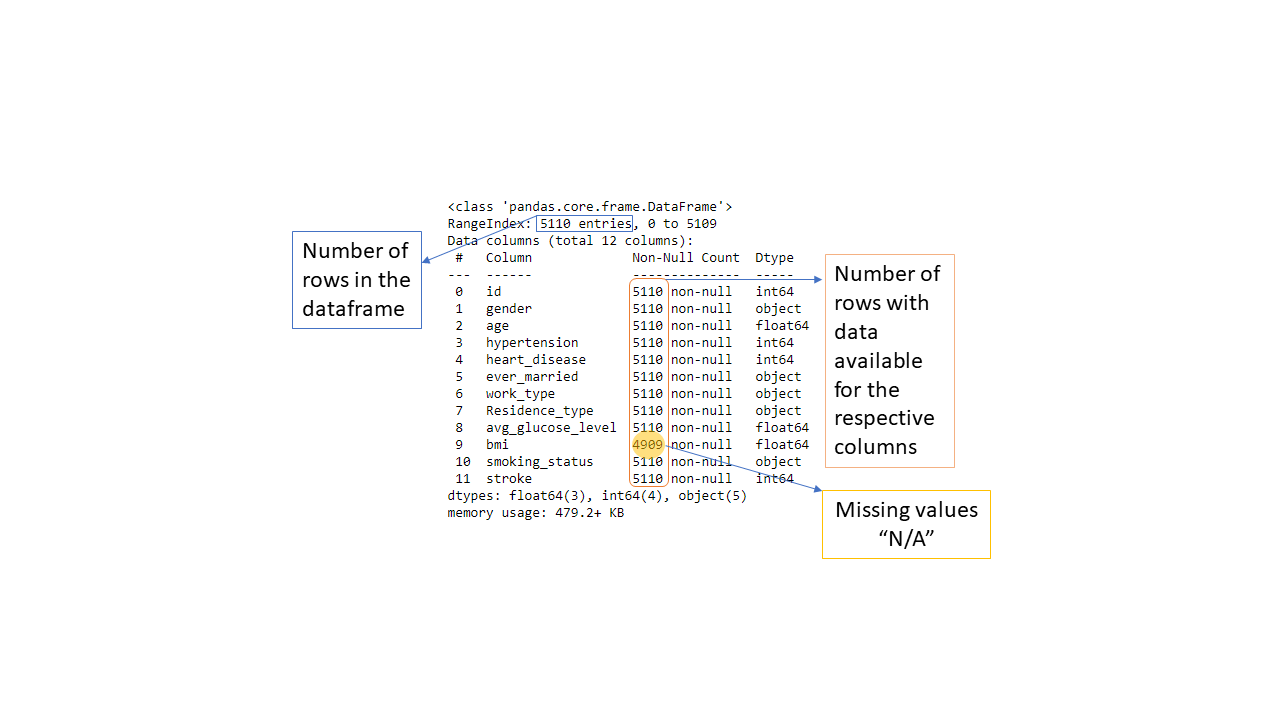

In [ ]:
from IPython import display
display.Image("C:/Users/kaden/Desktop/HHA550_Stroke_Data/df_info.png")

As seen above it is obvious that only column `bmi` has missing values. The datatype for the column `bmi` is `float64` therefore we have the below options for imputing the missing values:
* Mean values
* Median values
* Model based values

We will take the second option:
The missing values for the `bmi` column when stroke = 1 would be imputed with the median value of the same category(stroke = 1) and likewise the missing values for the `bmi` column when stroke = 0 would be imputed with the median value of the same category(stroke = 0).

In [ ]:
stroke.loc[(stroke.stroke == 1) & (stroke.bmi.isnull()), 'bmi'] = stroke.loc[(stroke.stroke == 1), 'bmi'].median()

In [ ]:
stroke.loc[(stroke.stroke == 0) & (stroke.bmi.isnull()), 'bmi'] = stroke.loc[(stroke.stroke == 0), 'bmi'].median()

<AxesSubplot:>

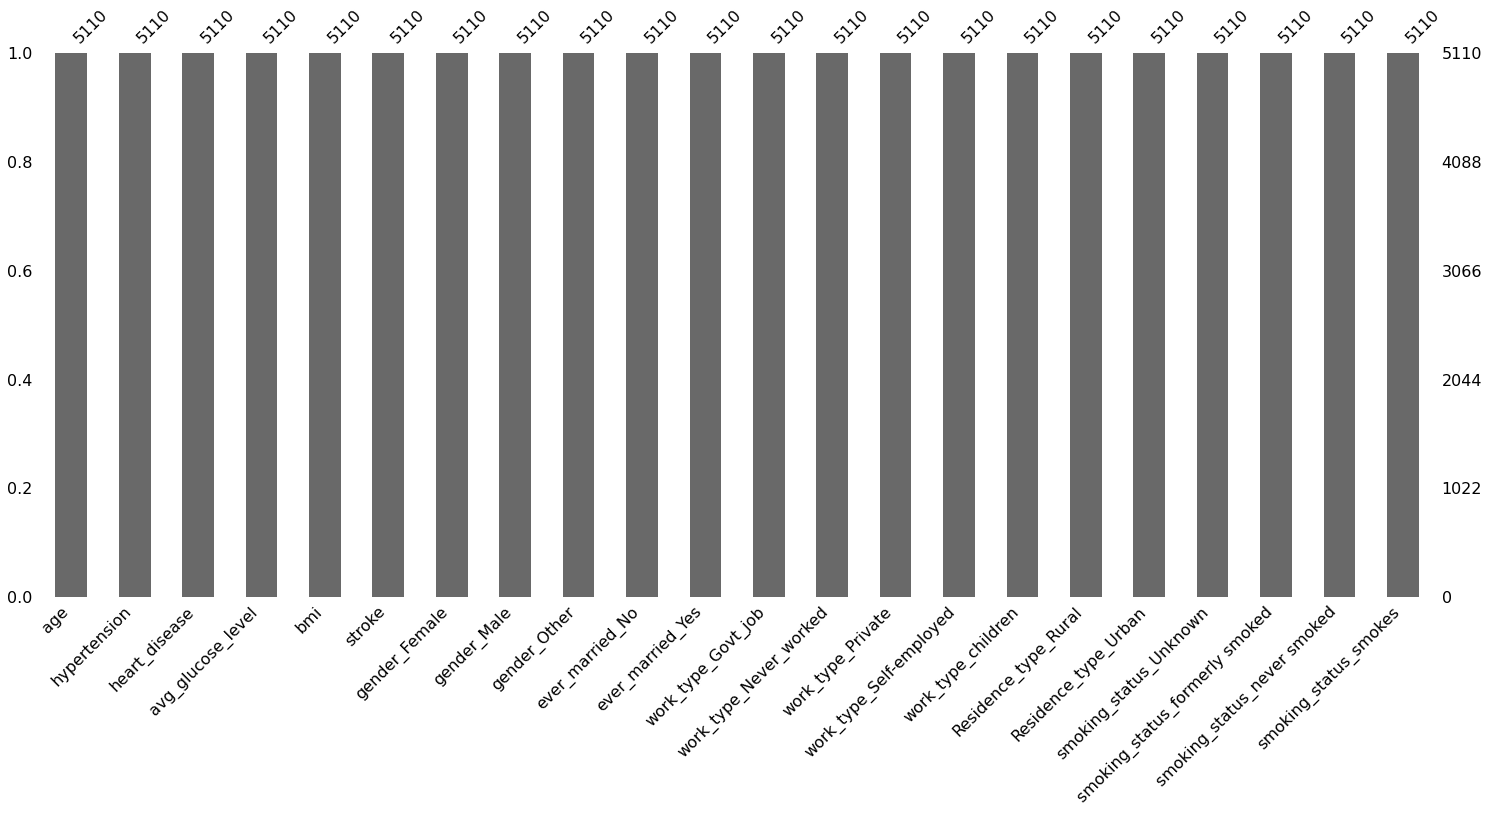

In [ ]:
msno.bar(stroke)

In [ ]:
stroke.head()

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
1  61.0             0              0             202.21  29.7       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   

   gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0              0            1             0                0  ...   
1              1            0             0                0  ...   
2              0            1             0                0  ...   
3              1            0             0                0  ...   
4              1            0             0                0  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                   0                     0                     1   
1                   0                     1                     0   
2                   0                     1                     0   
3                   0                     0                     1   
4                   0                     1                     0   

   smoking_status_Unknown  smoking_status_formerly smoked  \
0                       0                               1   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0  

[5 rows x 22 columns]

This provides with information to understand that we have a lot of missing values in some of the columns but its still difficult to understand that how big those missing value precentages are in comparison with other columns and therefore looking at it with visualization would give us a much better idea. For this we would be using missingno that we imported initially.

## Converting Categroical Features into Numeric Features

In [ ]:
# Using get_dummies from the pandas library to convert categorical feature to numeric
stroke = pd.get_dummies(stroke, drop_first = False)

# Breaking the data up into Train & Test

In [ ]:
train_df, valid_df, test_df = np.split(stroke.sample(frac=1, random_state=42), 
                                       [int(.7*len(stroke)), int(0.85*len(stroke))])
train_df = train_df.reset_index(drop = True)
valid_df = valid_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [ ]:
stroke.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
train_df.stroke.value_counts()

0    3404
1     173
Name: stroke, dtype: int64

In [ ]:
valid_df.stroke.value_counts()

0    726
1     40
Name: stroke, dtype: int64

In [ ]:
test_df.stroke.value_counts()

0    731
1     36
Name: stroke, dtype: int64

# Treating the Imbalance in the Data

Imbalance in the data means that one of the classes in the data is too less as compared to the others. Typically, it is better to balance the data in some way to give the positives more weight. There are 3 strategies that are typically utilized:

* Sub-sample the more dominant class: use a random subset of the negatives
* Over-sample the imbalanced class: use the same positive samples multiple times
* Create synthetic positive data

Usually, you will want to use the latter two methods if you only have a handful of positive cases. Since we have a few thousand positive cases, let's use the sub-sample approach. Here, we will create a balanced training data set that has 50% positive and 50% negative. You can also play with this ratio to see if you can get an improvement.

In [ ]:
def calc_prevalence(y_actual):
    
    '''
    This function is to understand the ratio/distribution of the classes that we are going to predict for.
    
    Params:
    1. y_actual: The target feature
    
    Return:
    1. (sum(y_actual)/len(y_actual)): The ratio of the postive class in the comlpete data.
    '''
    
    return (sum(y_actual)/len(y_actual))

In [ ]:
# split the training data into positive and negative
rows_pos = train_df.stroke == 1
df_train_pos = train_df.loc[rows_pos]
df_train_neg = train_df.loc[~rows_pos]

# merge the balanced data
stroke_df_balanced = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 111)],axis = 0)

# shuffle the order of training samples 
stroke_df_balanced = stroke_df_balanced.sample(n = len(stroke_df_balanced), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(stroke_df_balanced), \
                                                calc_prevalence(stroke_df_balanced.stroke.values)))

Train balanced prevalence(n = 346):0.500


In [ ]:
stroke_df_balanced.stroke.value_counts()

1    173
0    173
Name: stroke, dtype: int64

In [ ]:
X_train = stroke_df_balanced.drop('stroke',axis=1)

y_train = stroke_df_balanced['stroke']

X_valid = valid_df.drop('stroke',axis=1)

y_valid = valid_df['stroke']

X_test = test_df.drop('stroke',axis=1)

y_test = test_df['stroke']

In [ ]:
scaler=StandardScaler()
X_train[['age', 'bmi', 'avg_glucose_level']] = pd.DataFrame(scaler.fit_transform(X_train[['age', 'bmi', 'avg_glucose_level']]),columns=['age', 'bmi', 'avg_glucose_level'])
X_valid[['age', 'bmi', 'avg_glucose_level']] = pd.DataFrame(scaler.transform(X_valid[['age', 'bmi', 'avg_glucose_level']]),columns=['age', 'bmi', 'avg_glucose_level'])
X_test[['age', 'bmi', 'avg_glucose_level']] = pd.DataFrame(scaler.transform(X_test[['age', 'bmi', 'avg_glucose_level']]),columns=['age', 'bmi', 'avg_glucose_level'])

# Creating and Understanding Models

In [ ]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh = 0.5):
    
    '''
    This function calculates all the metrics to asses the machine learning models.
    
    Params:
    1. y_actual: The actual values for the target variable.
    2. y_pred: The predicted values for the target variable.
    3. thresh: The threshold for the probability to be considered as a positive class. Default value 0.5
    
    Return:
    1. AUC
    2. Accuracy
    3. Recall
    4. Precision
    5. Specificity
    '''
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

## Linear Regression

In [ ]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)


y_valid_preds = lnr.predict(X_valid)

In [ ]:
y_valid_preds

array([ 7.69929956e-01,  2.77285416e-01,  2.05797373e-01,  4.54640465e-01,
        3.20477186e-01,  1.57913562e-01,  4.92510152e-02,  4.42259260e-01,
        1.68692588e-01,  7.22706933e-02,  2.21986970e-01,  5.09143621e-01,
       -2.57795608e-02, -9.06346463e-02,  8.66775091e-02,  5.88812673e-02,
        4.67732435e-01,  2.66225301e-01,  4.50056061e-01, -4.99496188e-02,
        3.08485853e-01,  9.79803460e-01, -1.08658522e-01,  4.98898639e-01,
        5.34178477e-01,  5.81776176e-01,  8.41783957e-01,  7.88694076e-02,
        7.48835443e-01,  9.07273001e-01,  1.04920718e-01, -9.20101026e-02,
        3.58730007e-01,  2.52544350e-01,  3.16741060e-02,  2.57050147e-01,
        5.79440880e-01,  4.86621708e-01,  4.87472145e-03,  5.34918963e-01,
        8.99863631e-01,  6.76052049e-02,  6.32166637e-01,  1.65360692e-01,
       -5.24380758e-02,  4.35369047e-01,  8.30297447e-02,  3.67441561e-03,
        4.01185276e-01, -8.39038764e-03,  1.75471385e-02,  4.72713578e-01,
       -6.17449295e-02,  

## Logistic Regression

In [ ]:
lr=LogisticRegression(random_state = 42, solver = 'newton-cg', max_iter = 200)
lr.fit(X_train, y_train)

y_valid_preds = lr.predict_proba(X_valid)[:,1]

print('Metrics for Validation data:')

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, 0.5)

Metrics for Validation data:
AUC:0.823
accuracy:0.738
recall:0.750
precision:0.136
specificity:0.737
prevalence:0.052
 


## Explaining Results

In [ ]:
from IPython import display
display.Image("C:/Users/kaden/Desktop/HHA550_Stroke_Data/Explaining_Results.png")

FileNotFoundError: No such file or directory: 'C:/Users/kaden/Desktop/HHA550_Stroke_Data/Explaining_Results.png'

FileNotFoundError: No such file or directory: 'C:/Users/kaden/Desktop/HHA550_Stroke_Data/Explaining_Results.png'

<IPython.core.display.Image object>

#### AUC (area under the curve)
* values 0 to 1
* higher the AUC (closer to "1"), the better the performace of the model at distinguishing between the positive and negative clases.

#### Precision
* ratio between the correct predecitions and the total predicitons
* indicates how good is the model at watever it predicts

#### Recall
* (Sensitivity)
* Precision = TP/TP+F 
* Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

#### f1-score 
* F1 Score = 2*(Recall * Precision) / (Recall + Precision)
* is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy

#### Support
* positive counts (values)

#### Accuracy
* how close a measurement is to the true value
* Accuracy = TP+TN/TP+FP+FN+TN
* is simply a ratio of correctly predicted observation to the total observations.

#### Macro avg
* all classes equally contribute to the final averaged metric

#### Weighted avg
* each classes’s contribution to the average is weighted by its size

#### Important Insights into Results
* If on average, your measurements for a given substance are close to the known value, but the measurements are far from each other, then you have accuracy without precision
* Which is better accuracy or precision?
** Accuracy is something you can fix in future measurements. Precision is more important in calculations. When using a measured value in a calculation, you can only be as precise as your least precise measurement
* Is precision more important than recall?
** Recall is more important where Overlooked Cases (False Negatives) are more costly than False Alarms (False Positive). Precision is more important where False Alarms (False Positives) are more costly than Overlooked Cases (False Negatives). The focus in these problems is in weeding out the negative cases.
* F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).


#### Helpful Links
* https://towardsdatascience.com/choosing-performance-metrics-61b40819eae1#:~:text=The%20macro%20average%20precision%20is,less%20in%20the%20weighted%20average. 
* https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9 
* https://www.mariakhalusova.com/posts/2019-04-17-ml-model-evaluation-metrics-p2/#:~:text=Micro%2Daveraged%3A%20all%20samples%20equally,is%20weighted%20by%20its%20size

### Summary of Results (what is the most important?)
#### Logistic Regression vs Linear Regression results
* As per our use case we need the results to be classes i.e. Stroke or No-Stroke for which we need a model that works on classification.
* Using the Linear Regression as seen above is not giving us the results as 0 or 1 instead it is giving us the results in numerical form. The internal logic of linear regression does not work output the probability it just tries to get the output as close to the target in the training data. Whereas the logistic regression model works on probability principle.
* Linear regression would try to fit the data if it can be fit using straight line. If we just use regression then it can try to fit a curved surface too. Whereas the graph of Logistic regression takes the shape of a sigmoid. See the pictures below.

<p>
<img src = "LinearRegression.PNG">
</p>

<b><center>Analytics Vidhya - Fig.1 - Linear Regression Example</center></b>

<p>
<img src = "LogisticRegression.PNG">
</p>

<b><center>Analytics Vidhya - Fig.2 - Logistic Regression Example</center></b>

Lets look at some other models to see if we get better results.

## KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

knn_preds = knn.predict_proba(X_valid)[:,1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,knn_preds, 0.5)

AUC:0.812
accuracy:0.713
recall:0.775
precision:0.128
specificity:0.698
prevalence:0.052
 


## Stochastic Gradient Descent Model

In [ ]:
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train, y_train)

sgd_preds = sgdc.predict_proba(X_valid)[:,1]

print('Stochastic Gradient Descent')
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, \
                sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,sgd_preds, 0.5)

Stochastic Gradient Descent
Validation:
AUC:0.825
accuracy:0.731
recall:0.775
precision:0.136
specificity:0.729
prevalence:0.052
 


## Decision Tree

In [ ]:
dc_clf = DecisionTreeClassifier(random_state=42, max_depth = 10)
dc_clf.fit(X_train, y_train)

dc_preds_proba = dc_clf.predict_proba(X_valid)[:,1]
dc_preds = dc_clf.predict(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,dc_preds_proba, 0.5)

AUC:0.641
accuracy:0.680
recall:0.600
precision:0.095
specificity:0.685
prevalence:0.052
 


## Random Forest

In [ ]:
rf_clf = RandomForestClassifier(random_state=111, max_depth = 6)

rf_clf.fit(X_train, y_train)

rf_preds = rf_clf.predict(X_valid)
rf_preds_proba = rf_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,rf_preds_proba, 0.5)

AUC:0.822
accuracy:0.719
recall:0.750
precision:0.128
specificity:0.718
prevalence:0.052
 


## Linear SVC

In [ ]:
lsvc_clf = LinearSVC(random_state=111)
lsvc_clf.fit(X_train, y_train)

lsvc_preds = lsvc_clf.decision_function(X_valid)

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,lsvc_preds, 0.5)

AUC:0.820
accuracy:0.858
recall:0.450
precision:0.171
specificity:0.880
prevalence:0.052
 


## Gradient Boosting Model

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators = 100, criterion='friedman_mse', learning_rate = 1.0, max_depth = 3,\
                                    random_state = 111)

gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_valid)
gb_preds_proba = gb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,gb_preds_proba, 0.5)

AUC:0.798
accuracy:0.726
recall:0.675
precision:0.121
specificity:0.729
prevalence:0.052
 


## XGB Model

In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=3, learning_rate = 1.0, use_label_encoder = False,\
                            eval_metric = 'logloss')
xgb_clf.fit(X_train, y_train)

xgb_preds = xgb_clf.predict(X_valid)
xgb_preds_proba = xgb_clf.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,xgb_preds_proba, 0.5)

AUC:0.817
accuracy:0.722
recall:0.725
precision:0.126
specificity:0.722
prevalence:0.052
 


## Catboost Model

In [ ]:
catb=CatBoostClassifier(iterations=200, depth=3, learning_rate=1.0, random_state = 111)
catb.fit(X_train, y_train)
catb_preds = catb.predict_proba(X_valid)[:, 1]

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,catb_preds, 0.5)

0:	learn: 0.5064841	total: 66.9ms	remaining: 13.3s
1:	learn: 0.4662750	total: 68.1ms	remaining: 6.74s
2:	learn: 0.4474312	total: 69.1ms	remaining: 4.53s
3:	learn: 0.4332415	total: 70ms	remaining: 3.43s
4:	learn: 0.4164106	total: 71.2ms	remaining: 2.78s
5:	learn: 0.3853243	total: 72.3ms	remaining: 2.34s
6:	learn: 0.3592484	total: 73.5ms	remaining: 2.03s
7:	learn: 0.3275688	total: 74.7ms	remaining: 1.79s
8:	learn: 0.3205659	total: 75.9ms	remaining: 1.61s
9:	learn: 0.3054361	total: 77ms	remaining: 1.46s
10:	learn: 0.2849862	total: 78.1ms	remaining: 1.34s
11:	learn: 0.2751173	total: 79.1ms	remaining: 1.24s
12:	learn: 0.2609338	total: 80.2ms	remaining: 1.15s
13:	learn: 0.2545338	total: 81.3ms	remaining: 1.08s
14:	learn: 0.2454883	total: 82.3ms	remaining: 1.01s
15:	learn: 0.2326937	total: 83.4ms	remaining: 959ms
16:	learn: 0.2245675	total: 84.2ms	remaining: 907ms
17:	learn: 0.2097930	total: 85.1ms	remaining: 861ms
18:	learn: 0.2014676	total: 86.2ms	remaining: 821ms
19:	learn: 0.1882524	total

# Hyper Parameter Tuning

* From the above models we will choose two models for demonstration i.e. Random Forest, Decision Trees for hyper-parameter tuning.
* Generally you can pick up the top three models based on the 'AUC', 'Recall' or 'F1 score' score and tune them.

There are many techniques for hyper-parameter tuning:

* Random Search
* Grid Search
* Halving Grid Search(added recently in sklearn)

Special Note:
* It will take significant time to run Hyper Parameter Tuning 
* Timing will depend on available resources of server

In [ ]:
recall_scoring = make_scorer(recall_score)

## Decision Tree - Hyper Parameter Tuning

In [ ]:
dc_grid = {'max_features':['auto','sqrt'], # maximum number of features to use at each split
           'max_depth':range(1,11,1), # maximum depth of the tree
           'min_samples_split':range(2,10,2), # minimum number of samples to split a node
           'criterion':['gini','entropy']} # criterion for evaluating a split

dc_random = RandomizedSearchCV(estimator = dc_clf, param_distributions = dc_grid, 
                               n_iter = 20, cv = 2, scoring=recall_scoring,
                               verbose = 1, random_state = 111)

dc_random.fit(X_train, y_train)

dc_random.best_params_

dc_hp_preds = dc_random.best_estimator_.predict(X_valid)
dc_hp_preds_proba = dc_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, dc_hp_preds_proba)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


0.809486914600551

In [ ]:
recall_score(y_valid, dc_hp_preds)

0.85

## Random Forest - Hyper Parameter Tuning

In [ ]:
rf_grid = {'n_estimators':range(200,1000,200), # number of trees
           'max_features':['auto','sqrt'], # maximum number of features to use at each split
           'max_depth':range(1,11,1), # maximum depth of the tree
           'min_samples_split':range(2,10,2), # minimum number of samples to split a node
           'criterion':['gini','entropy']} # criterion for evaluating a split

rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = rf_grid, 
                               n_iter = 20, cv = 2, scoring=recall_scoring,
                               verbose = 1, random_state = 111)

rf_random.fit(X_train, y_train)

rf_random.best_params_

rf_hp_preds = rf_random.best_estimator_.predict(X_valid)
rf_hp_preds_proba = rf_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, rf_hp_preds_proba)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


0.824862258953168

In [ ]:
recall_score(y_valid, rf_hp_preds)

0.825

## XGBoost - Hyper Parameter Tuning

In [ ]:
xgb_grid = params = {
        'min_child_weight': [1, 5, 8, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 0.9, 1.0],
        'max_depth': [3, 4, 5]
        } # criterion for evaluating a split

xgb_random = GridSearchCV(estimator = xgb_clf, param_grid = xgb_grid, 
                               cv = 2, scoring = recall_scoring,
                               verbose = 1)

xgb_random.fit(X_train, y_train)

xgb_random.best_params_

xgb_hp_preds = xgb_random.best_estimator_.predict(X_valid)
xgb_hp_preds_proba = xgb_random.best_estimator_.predict_proba(X_valid)[:,1]
roc_auc_score(y_valid, xgb_hp_preds_proba)

Fitting 2 folds for each of 720 candidates, totalling 1440 fits


0.8310261707988982

In [ ]:
recall_score(y_valid, xgb_hp_preds)

0.775

### Comparing Hyper Parameter Tuning Results
* We can see that even after the hyper-parameter tuning XGB is not performing well as compared to Decision Tree and Random Forest.
* To choose the best model we need to take a look at a better AUC and recall score(for our use-case). As per the scores above we can see that the Decision Tree and Random Forest are both close but it would be better to choose Random Forest as it reduces the variance.
* We can even try to use Halving Grid Search and try to experiment with more parameters to have an exhaustive search.

# Summary of Model Results and Findings

* We can see that this is a tricky dataset and therefore the normal models might not work, we would need to further use hyper-parameter tuning to improve the performance. To learn about hyper-parameter tuning click [here](https://scikit-learn.org/stable/modules/grid_search.html).
* Deep Learning techniques can also be used as they can prove to be really effective in such tricky datasets. One can use `CNN(Convolutional Neural Network)` for this or can also try to use `RNN(Recurrent Neural Network)`.

In this notebook we have created a binary classifier to predict the probability that a patient with certain condition would get a stroke or not. On held out test data, our best model had a recall of of 0.83. Using this model, we are able to catch 83% of the patients with stroke correctly. While building the models we have focussed on making sure that we have the least number of false negatives and therefore we have used recall as the metric. 